# PM Homework 12

**FBA Quant 이의형**

---

## Summarize the paper

- A STEP-BY-STEP GUIDE TO THE BLACK-LITTERMAN MODEL (Thomas M. Idzorek)  
- ~ Section 2

### ABSTRACT

- 블랙-리터만 모델을 사용하면 자신의 뷰를 포트폴리오 구성에 넣을 수 있다.
- 본 논문은 해당 모델을 구현할 수 있도록 단계별 지침을 제공한다.
- 뷰로부터 tilt와 포트폴리오 가중치를 조절하는 방법을 소개한다.
    - 이 방법은 신뢰 수준을 기반으로 tilting하는 정도를 제어해야 한다.
    - 이로부터 블랙-리터만 모델의 추상적인 파라미터를 직관적으로 정할 수 있다.

###  Introduction

- 블랙-리터만 모델은 아래의 문제를 극복하는 정교한 포트폴리오 구축 방법이다.
    - unintuitive, highly-concentrated portfolio
    - input-sensitivity
    - estimation error
    - MVO와 관련된 이러한 문제들 때문에 실무에서는 잘 쓰이지 않는다.
- 블랙-리터만 모델은 베이지안 접근으로 투자자의 주관적 견해와 market equilibrium vector(과거 분포)를 결합하여 새로운 기대 수익률 추정치를 만든다.
    - 새로운 벡터(후행 분포)는 합리적인 가중치를 가진 직관적 포트폴리오를 만든다.
- 논문은 다음과 같은 방향으로 진행된다.
    - section 1: MVO의 민감도와 reverse optimization이 문제를 완화하는 방법 설명
    - section 2: 블랙-리터만 모델과 필요한 input을 구축하는 프로세스 소개
    - section 3: 뷰에 대한 implied confidence framework를 개발

### 1. Expected Returns

- 블랙-리터만 모델은 투자자의 통찰을 바탕으로 안정적인 포트폴리오를 구성하여 input-sensitivity를 극복한다.
- 블랙-리터만 모델은 기대수익률 벡터 전체에 오차를 분산시킴으로써 estimation error-maximization 문제를 상당히 완화시킨다. (Lee(2000))
- MVO에서 가장 중요한 input은 기대 수익률 벡터인데, 자산 중 하나의 기대수익률이 약간만 증가해도 포트폴리오에서 자산의 절반이 강제로 제외될 수 있다는 것을 입증했다. (Best and Grauer(1991))
- 대안
    - historical return
    - equal mean return for all assets
    - risk-adjusted equal mean return
    - 결과
        - 제약이 있을 때: 소수의 종목에 집중
        - 제약이 없을 때: 롱, 숏 한쪽으로만 집중

#### 1-1. Reverse Optimization

- 블랙-리터만 모델은 equilibrium return을 사용
    - 이는 reverse optimization으로부터 생성
        - 내재초과균형수익률 벡터 이용
        
        $$\Pi = \lambda \Sigma w_{mkt}$$  
          
        - $\Pi$: 내재초과균형수익률 벡터 (N x 1 열벡터)
        - $\lambda$: 위험 회피 계수
            - 수익률과 위험의 trade-off
            - 초과 수익률에 대한 스캐일링 파라미터
        - $\Sigma$: 초과 수익률의 공분산 행렬 (N x N 행렬)
        - $w_{mkt}$: 시가총액 가중치

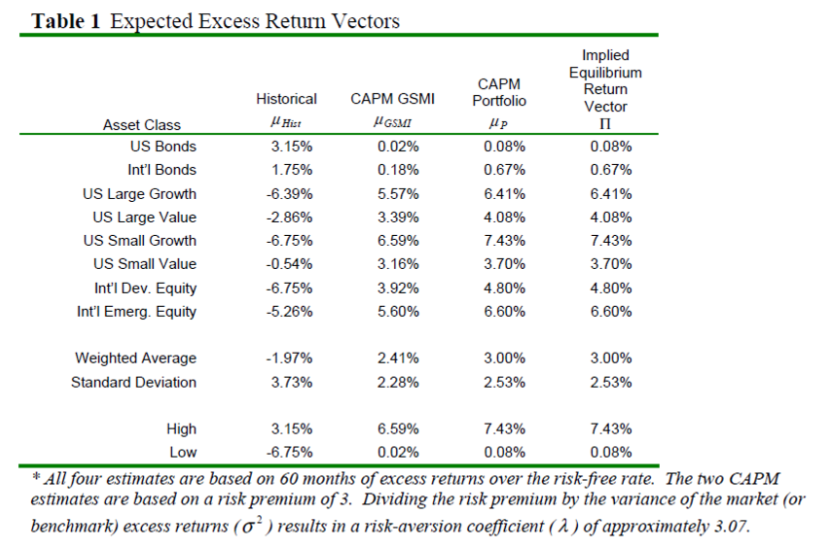

- CAPM GSMI: 시장을 GSMI로 보고 산출한 CAPM
- CAPM Portfolio: 시장을 시가총액 가중 포트폴리오로 보고 산출한 CAPM
- $w = (\lambda \Sigma)^{-1} \mu$
    - $\mu \ne \Pi, \;\; w \ne w_{mkt}$
- Table 1의 수익률 벡터를 기반으로 최적화한 가중치: Table2

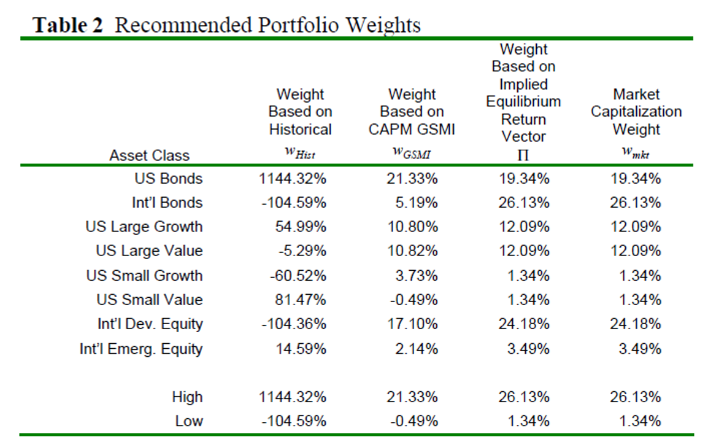

- CAPM과 내재균형수익률 벡터의 가중치는 Table 1에서 비슷함에도 불구하고 다른 가중치를 얻는다.
- 투자자는 시장 포트폴리오를 보유해야한다.
- 따라서 $\Pi$는 market-neutral starting point이다.

### 2. The Black-Litterman Model

#### 2-1. The Black-Litterman Formula

- $K$: View의 개수
- $N$: 자산의 개수
    - 공식
        
        $$
        E[R] = [(\tau \Sigma)^{-1} + P' \Omega^{-1}P]^{-1} \;\; [(\tau \Sigma)^{-1} \Pi + P'\Omega^{-1}Q]
        $$
        
    - $E[R]$: 새로 업데이트 된 수익률 벡터 (N x 1 열벡터)
    - $\tau$: 스칼라
        - 위험조정상수: 공분산 추정값에 대한 보정
        - 0~1 사이 값: 높으면 기대수익률이 옳다고 판단
    - $\Sigma$: 초과 수익률의 공분산 행렬 (N x N 행렬)
    - $P$: 투자자의 자산에 대한 뷰의 행렬 (K x N 행렬 or 1 x N 행벡터(special case))
    - $\Omega$: error term의 대각 공분산 행렬 (K x K 행렬)
        - 뷰에 대한 불확실성
    - $\Pi$: 내재균형수익률 벡터 (N x 1 열벡터)
    - $Q$: 뷰 벡터 (K x 1 열벡터)

#### 2-2. Investor Views

- 투자자는 내재균형수익률과는 다른 구체적 견해를 가지고 있다.
- 투자자의 뷰
    - View1: IDE는 5.25%의 수익을 창출할 것이다.  → 25% (절대)
    - View2: IB는 USB를 25bp 아웃퍼폼할 것이다. → 50% (상대)
    - View3: 대형, 소형 성장주는 대형, 소형 가치주를 2% 아웃퍼폼할 것이다. → 65% (상대)
- 해석
    - IDE의 내재균형수익률은 4.8%로 45bp 낮다.
    - USB와 IB는 각각 0.08%, 0.67%로 IB가 0.59% 높다.
        - View2에서의 0.25%는 0.59%보다 낮으므로 USB로 tilting할 것
    - View3은 여러 자산을 비교
        - 비교하는 자산의 수가 일치할 필요는 없다.
        - 뷰의 자산으로 2개의 미니 포트폴리오를 생성 (롱, 숏)
            - 각 포트폴리오의 비중은 각 시가총액 가중으로 설정 (현재 시장)
            - 설정한 포트폴리오의 기대 수익률과 2%를 비교하여 우수한 쪽으로 tilting

#### 2-3. Building the Inputs

- 뷰를 어떻게 넣을 것인가
- 모든 자산에 대해 뷰가 필요하지 않다.
- 8개의 자산 중 3개의 자산에 대한 뷰만 가지고 있다면
    - $K$는 3, $Q$는 3 x 1 열벡터
    - $\epsilon$:  오차항, 뷰에 대한 불확실성
        - 평균 0, 공분산 $\Omega$

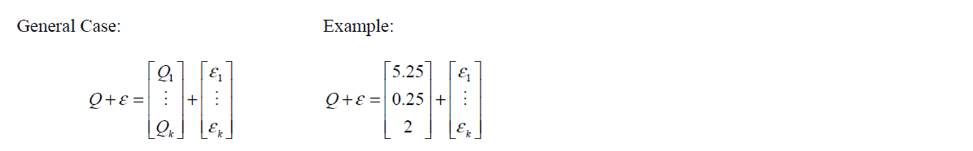

- 오차항은 직접적으로 입력에 들어가진 않지만, 각 오차항의 분산($w$)은 $\Omega$로 생성되어 들어간다.
    - $\Omega$는 대각 성분을 제외한 성분이 0인 대각 행렬 (independent)
    - 오차항의 분산이니까 $\Omega$는 불확실성에 대한 정도
    - $\Omega$를 결정하는 법은 Section 3에서…
- $Q$는 행렬 $P$의 특정 자산으로 매칭된다.
    - 각 뷰는 1 x N 크기의 행벡터로, K개의 뷰는 K x N 크기
    - 예시

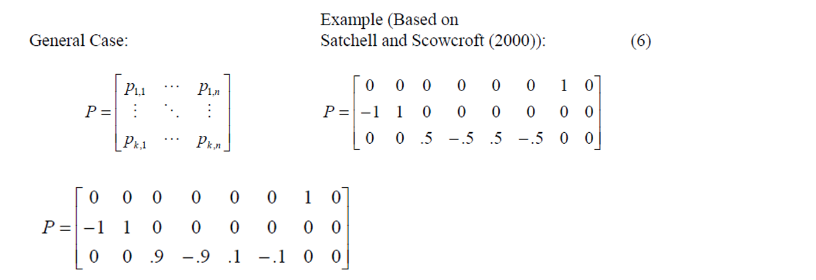

- 첫번째 행은 View1을 나타내며, 7번째에 자리한 자산이기에 $P$에도 1로 표시
- 상대적인 비교에서는 각 행의 합이 0이어야한다.
    - 언더퍼폼을 음수로, 아웃퍼폼을 양수로
    - 가중치를 부여하는 다양한 방식이 있지만, 여기서는 예로 동일가중을 설정
        - 저자는 시가총액 가중을 선호
- 행렬 $P$가 정의되면 각 개별 뷰의 분산 계산 가능
    - $p_k \Sigma p_k':$ 개별 뷰 포트폴리오의 분산
    - $p_k:$ 1 x N 행벡터 (in P 행렬)
    - $\Sigma:$ 자산들의 초과수익의 공분산 행렬

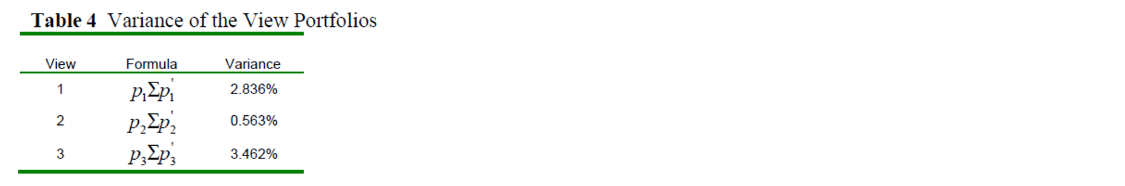

- 이는 뷰에 적용해야하는 신뢰 수준의 정도에 관한 정보
    - $\Omega$를 생성하는 error term들의 분산($w$)을 검토하는데 이용
- 블랙-리터만 모델은 내재균형수익률벡터 $\Pi$와 뷰 벡터 $Q$의 복잡한 가중평균 형태
- 상대적 가중치: 공분산 가중치 $\tau$와 뷰에 대한 가중치 $\Omega$
    - 이 2개를 구하기가 매우 추상적이고 어렵다.
        - 뷰에 대한 신뢰수준이 클수록, 새로운 수익률 벡터는 뷰에 더 가까워질 것
        - 뷰에 대한 확신이 없다면, 새로운 수익률 벡터는 내재균형수익률 벡터에 가까워질 것
    - 평균의 불확실성은 수익률의 불확실성보다 적기 때문에 $\tau$는 0에 가깝다.
        - 균형 수익률은 과거 수익률보다 변동이 적을 것으로 예상할 수 있다.
        - Lee: 0.01 ~ 0.05 사이 값으로 설정 후, tracking error의 목표 수준에 따라 보정-
    - Satchell, Scowcroft: 반대로 1로 설정
    - Blamont, Firoozye: $\tau \Sigma$를 내재균형수익률의 추정치 표준오차로 설정
- 제약조건이 없는 경우, 블랙-리터만 모델은 해당 자산이 뷰의 대상인 경우만 시총 가중에서 벗어날 것을 권장
    - 벗어나는 비중은 $\tau$와 해당 견해의 오차 항($w$)의 분산의 비율로 조절
- 블랙-리터만 모델을 보정하는 가장 쉬운 방법은 뷰의 신뢰수준을 $w / \tau$는 뷰 포트폴리오의 분산과 동일하다고 가정하는 것
    - 이 방법은 실제 $\tau$값이 아닌 비율이 입력되게 한다.

#### 2-4. Calculating the New Combined Return Vector

지금까지의 파라미터를 블랙-리터만 모델에 넣어 업데이트된 $E[R]$을 구하고, 이로부터 새로운 weight 추출

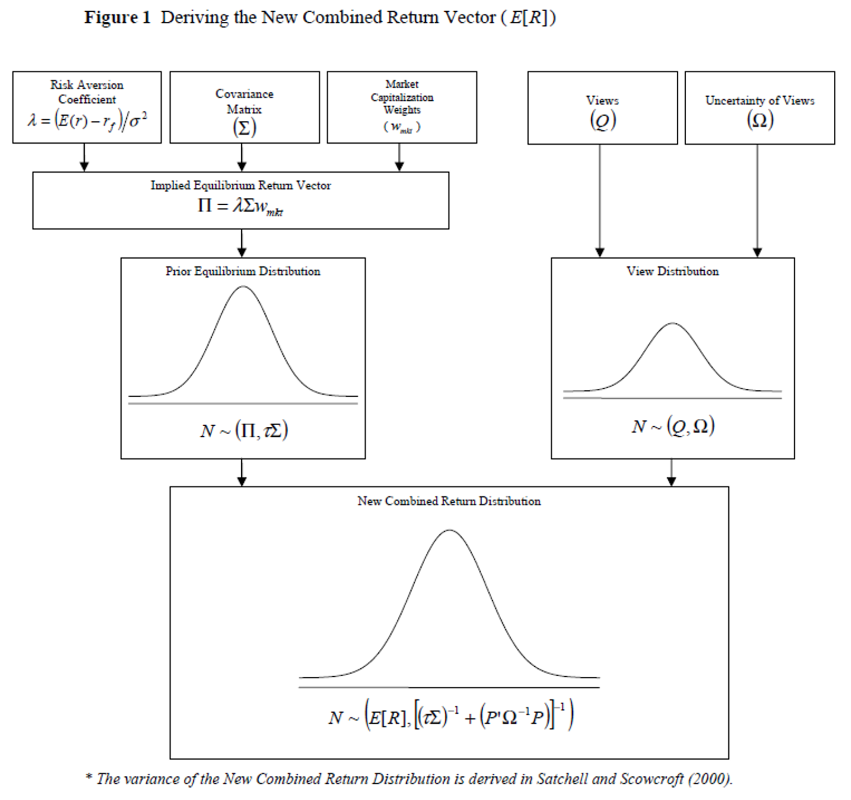

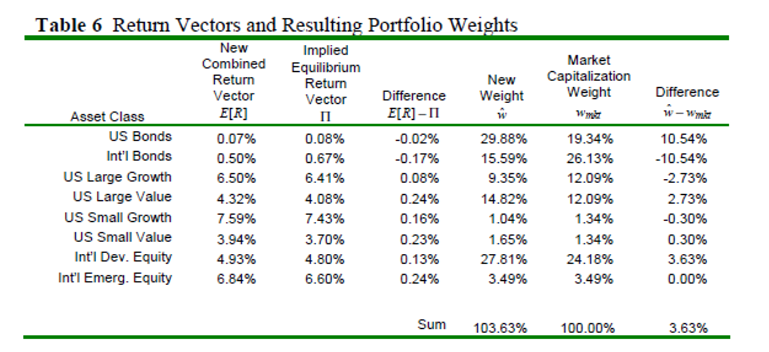

- 뷰가 들어간 7개의 자산만이 가중치의 변화가 생긴다.
- 거시적 관점에서 새 포트폴리오는 원래의 시총 가중 포트폴리오와 뷰에 따른 롱숏 포트폴리오의 결합

#### 2-5. Fine Tuning the Model

- 새로운 수익률 벡터 $E[R]$로부터, $\tau$와 ($\Omega$로 이어지는) $\omega$$w$
    - 최적 가중치를 도출한 뒤, 새 포트폴리오의 예상 정보 비율을 계산한다. (최대 2.0 추천)
        - 정보 비율이 2.0 이상이라면, 뷰에 부여된 가중치를 줄여라.
        
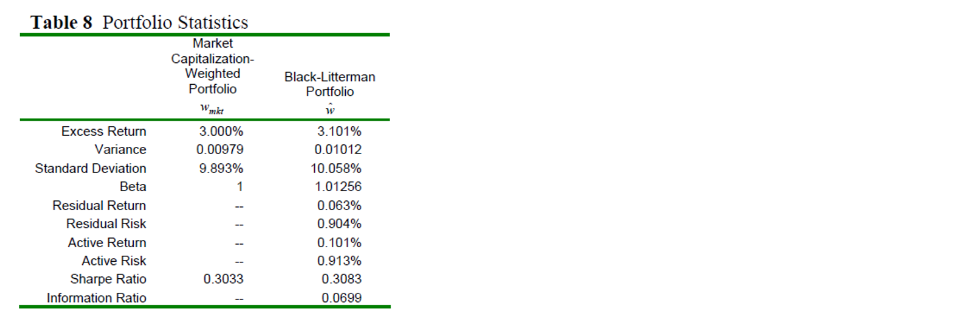

- 전반적으로 큰 차이는 없지만 정보비율과 샤프는 약간 증가
- 다음으로, 원치 않는 주식은 뺀다.
    - 예) 롱/숏만 해야하는 투자자라면 절대 수익 View는 빼버려라.
- 투자자는 사후 정보비율을 평가해야한다.
    - 특정 애널리스트의 정보 계수를 기준으로 특정 견해의 신뢰도를 설정
    - 더 숙련된 분석가에게 상대적으로 더 큰 importance를 부여
- 팁: 단순 공분산 행렬이 아닌 다른 최선의 추정치를 도출해봐라.

---